Experimenting a function for the part of model's score considering the number of true values that will be lost due to using lower/upper threshold. 

We assume that some percentage (say, between 0% and 20%) of such a loss is bearable, and would be preferred if the other part of the score, considering the % of true predictions, is high.

On the other hand, if we go beyond that berable percentage of lost true values (say beyond 20%) then bearing of this price declines sharply. To understand why - imagine that we have 0% of false values, at the price of putting 100% of the vlaues in between the lowe/upper thresholds. Obviously we want to avoid that. 

So this part of the score requires a function with a shape similar to the one drawn below.

We'll use a function which is based on the Sigmoid function"
    1/(1 + np.exp(-x))

with:
1. Changing (x) to (1-x), so we flip the curve to be high near 0 and decline sharply at some point, till reaching zero
2. Adding alpha, beta and gamma modifiers to enable controlling the curve's attributes:
    * alpha controls the point where the graph starts to decline sharply (= the % of lost true values which is berable and should get relatively high score for this aspect)
    * beta controls the width of the sharply declining portion of the curve
    * gamma controls the smoothness of the cliff-shape part of the graph. A high gamma will make the curvie less somooth, i.e. more 'cliffy'. 
    
So our Sigmoid-modofed function is:

    1/(1 + np.exp(-(1-(x+alpha)*beta)*gamma)) 

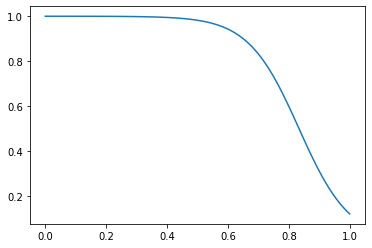

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Settings

In [2]:
x_range = [0, 1]
alpha = 0.55
beta = 1.2
gamma = 30

# Curve function definition

In [3]:
def f(x):
    
    # Based on Sigmoid, with changing x ==> (1-x)
    # and adding alpha, beta and gamma controls, as explained at the
    # beginning of this notebook
    
    return 1/(1 + np.exp(-(1-(x+alpha)*beta)*gamma)) 

# Main

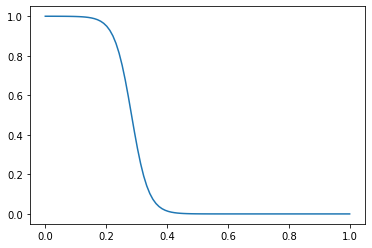

In [4]:
x = np.linspace(x_range[0], x_range[1], 100)
y = f(x)

plt.plot(x, y)
plt.show()

### Checking the score [0.0-1.0] for the % of lost true values that we are considering at the model evaluation notebook (5%, 10%, 15%, 20%) + 2 more values in the same direction (25%, 30%)

In [6]:
f(0.05), f(0.1), f(0.15), f(0.2), f(0.25), f(0.30)

(0.9997751832297667,
 0.9986414800495711,
 0.9918374288468401,
 0.9525741268224334,
 0.7685247834990179,
 0.35434369377420444)